In [1]:
# Dataset: Natural Language to Python Code
#Author: Link An Jarad
# Source: Link An Jarad. (2022). Natural Language to Python Code [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/3512475
# URL: https://www.kaggle.com/datasets/linkanjarad/coding-problems-and-solution-python-code
# Description: Link An Jarad (2022) developed this data set to generate python code
# from Natural Language Text with code functionality descriptions.

In [3]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re


In [4]:
#Dataset is Loaded to df_raw Dataframe
df_raw = pd.read_csv('../data/raw/Kaggel/ProblemSolutionPythonV3.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3307 non-null   int64 
 1   Problem      3307 non-null   object
 2   Python Code  3306 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.6+ KB


In [5]:
#Dataset contains 3307 rows, with 3 columns 
#First column does not provides any valid information as it is not labeled and it is not described on the Data Dictionary
#'Python Code' Column contains a Null entry.
#Both 'Problem' and 'Python Code' Columns are strings (object)

In [6]:
df_raw.shape

(3307, 3)

In [7]:
df_raw.sample(10, random_state=2010)

,Unnamed: 0,Problem,Python Code
3290,3290,Find out all Sunny numbers present within a gi...,"\r\nimport math\r\nprint(""Enter a range:"")\r\n..."
450,450,Write a Python program to remove newline chara...,def remove_newlines(fname):\r\n flist = ope...
1847,1847,Write a Python program to Merging two Dictiona...,# Python code to merge dict using update() met...
2551,2551,Python Program to Determine all Pythagorean Tr...,"limit=int(input(""Enter upper limit:""))\r\nc=0\..."
3167,3167,Python Program to Compute Simple Interest Give...,"\r\nprinciple=float(input(""Enter the principl..."
1082,1082,Write a Python program to get a string from a ...,def change_char(str1):\r\n char = str1[0]\r\n...
990,990,Write a Pandas program to subtract two timesta...,"import pandas as pd\r\nprint(""Subtract two tim..."
3297,3297,Find sum multiplication and an average of two ...,"\r\nnum1=int(input(""Enter a number:""))\r\nnum2..."
221,221,Write a Pandas program to find which years hav...,import pandas as pd \r\n\r\n# World alcohol co...
1748,1748,Write a Python program to Convert List to List...,# Python3 code to demonstrate working of \r\n#...


In [8]:
#From multiple samples of the raw data, it is visible that the Python Code column contains multiple symbol characters, like single 
#quotes, curly braces, square brackets, line jump, and more.

#Problem Column also contains symbol characters like $, -, (, ), and more.


In [9]:
df_raw.columns

Index(['Unnamed: 0', 'Problem', 'Python Code'], dtype='object')

In [10]:
#Drop 'Unnamed: 0' Column as it is an unnecesary column.
df_processed = df_raw.drop(df_raw.columns[0], axis=1).copy()

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3307 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


In [11]:
#NAN Values are droped from the Dataset
df_processed.isna().sum()

Problem        0
Python Code    1
dtype: int64

In [12]:
df_processed = df_processed.dropna(axis=0, how='any') #drop every row were there is column with a Nan value

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3306 entries, 0 to 3306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Problem      3306 non-null   object
 1   Python Code  3306 non-null   object
dtypes: object(2)
memory usage: 77.5+ KB


In [13]:
df_processed.sample(10)

,Problem,Python Code
3257,Program to compute the area and perimeter of O...,"\r\n\r\nimport math\r\nprint(""Enter the length..."
603,Write a Pandas program to create a plot of Ope...,import pandas as pd\r\nimport matplotlib.pyplo...
2204,Write a Python program to Remove K length Dupl...,# Python3 code to demonstrate working of \r\n#...
1400,Write a Python program to print out a set cont...,"color_list_1 = set([""White"", ""Black"", ""Red""])\..."
628,Write a Python program to create a deep copy o...,"import copy\r\nnums_x = [1, [2, 3, 4]]\r\nprin..."
1560,Write a Python program to sort a list of eleme...,# License: https://bit.ly/2V5W81t \r\ndef cycl...
1562,Write a Pandas program to create a histogram t...,import pandas as pd\r\nimport matplotlib.pyplo...
2580,"Program to Print series 1,2,8,16,32...n","n=int(input(""Enter the range of number(Limit):..."
555,Write a Pandas program to create a horizontal ...,import pandas as pd\r\nimport matplotlib.pyplo...
306,Write a Python program to add a number to each...,"def add_val_to_list(lst, add_val):\r\n resu..."


In [14]:
df_processed['Problem'].value_counts()

Problem
Write a program to print the alphabet pattern                                                                                                                                              8
Program to Find subtraction of two matrices                                                                                                                                                6
Write a program to print the pattern                                                                                                                                                       5
Program to display a lower triangular matrix                                                                                                                                               4
Program to find the sum of an upper triangular matrix                                                                                                                                      4
                                               

In [15]:
#From Problem Column Value Count it is visible that the same problem description can have multiple solutions, as the
#same value from Problem Column appears multiple times. 

In [16]:
df_processed[df_processed['Problem']=='Write a program to print the alphabet pattern']

,Problem,Python Code
2798,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
2897,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
2907,Write a program to print the alphabet pattern,"\r\nprint(""Enter the row and column size:"")\r\..."
3038,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3098,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3122,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3154,Write a program to print the alphabet pattern,"\r\n\r\nprint(""Enter the row and column size:""..."
3249,Write a program to print the alphabet pattern,"\r\nprint(""Enter the row and column size:"")\r\..."


In [17]:
#By Manually comparing the 'Python Code' Values, it is confirmed that there are duplicated values on the Dataset, having the 
#same 'Problem' Description, and 'Python Code' Solution.
#It is also confirmed from previous Code Chunk, that the same 'Problem' Description can have multiple 'Python Code' Solution

In [18]:
df_processed['Python Code'].value_counts()

Python Code
# Get size of matrix\r\nrow_size=int(input("Enter the row Size Of the Matrix:"))\r\ncol_size=int(input("Enter the columns Size Of the Matrix:"))\r\n\r\nmatrix=[]\r\n# Taking input of the 1st matrix\r\nprint("Enter the Matrix Element:")\r\nfor i in range(row_size):\r\n    matrix.append([int(j) for j in input().split()])\r\n\r\nmatrix1=[]\r\n# Taking input of the 2nd matrix\r\nprint("Enter the Matrix Element:")\r\nfor i in range(row_size):\r\n    matrix1.append([int(j) for j in input().split()])\r\n\r\n# Compute Subtraction of two matrices\r\nsub_matrix=[[0 for i in range(col_size)] for i in range(row_size)]\r\nfor i in range(len(matrix)):\r\n    for j in range(len(matrix[0])):\r\n        sub_matrix[i][j]=matrix[i][j]-matrix1[i][j]\r\n\r\n# display the Subtraction of two matrices\r\nprint("Subtraction of the two Matrices is:")\r\nfor m in sub_matrix:\r\n    print(m)                                                                                                                

In [19]:
#From 'Python Code' Value Counts it is confirmed that there are repeated values for this column.

In [20]:
#Stop Words is Loaded to remove unnecesary words from the 'Problem' column text
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arnaldochm/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
#CREATE PREPROCESSOR

#As 'Problem' Descriptions are in english, english stop words are downloaded
stop_words = stopwords.words('english')

#Se eliminan las palabras innecesarias/reduntates: and, or, ...
def remove_stopwords(text:str)->str:
    clean_text = []
    eliminited_text = []
    if text is not None:
        words = text.split()
        for word in words:
            if word not in stop_words:
                clean_text.append(str(word))
            else:
                eliminited_text.append(str(word))
        return (' '.join(clean_text),' '.join(eliminited_text))
    else:
        return None

def remove_symbols(text:str)->str:
    if text is not None:
        text = text.lower()
        text = re.sub(r'''[.,?*&'"+${}-]''','',text) #PREGUNTA PARA MANU: SIMBOLOS IMPORTATES PARA LA DESCRIPCION? (), %
        text = re.sub(r"\n",' ',text)
        text = text.strip()
        return text
    else:
        return None

In [22]:
#Cuando en el problema nos dan un $, o un caracter no comun.
# podemos cambiarlo por un texto no representativo
#El stop words me elimina el "to", por ejemplo. En problemas como "got from a to b"

In [23]:
#New Column 'clean_problem' is created applying the preprocessor to remove stopwords and symbols
df_processed['clean_problem'] = df_processed['Problem'].apply(lambda x: remove_symbols(x))
df_processed['clean_problem'] = df_processed['clean_problem'].apply(lambda x: remove_stopwords(x)[0])

In [24]:
#Check removed words:
removed_stopwords = df_processed['clean_problem'].apply(lambda x: remove_stopwords(x)[1])

removed_stopwords

0        
1        
2        
3        
4        
       ..
3302     
3303     
3304     
3305     
3306     
Name: clean_problem, Length: 3306, dtype: object

In [25]:
df_processed.sample(10, random_state= 2045)

,Problem,Python Code,clean_problem
1902,Write a Python program to Sort Tuples by Total...,# Python3 code to demonstrate working of \r\n#...,write python program sort tuples total digits
191,Write a Python program to find the list with m...,def max_length_list(input_list):\r\n max_le...,write python program find list maximum minimum...
636,Write a Python program to count the occurrence...,from collections import Counter\r\ncolors = ['...,write python program count occurrence element ...
490,"Write a Python program to print a long text, c...",string_words = '''United States Declaration of...,write python program print long text convert s...
3014,Print vowels in a string,"\r\nstr=input(""Enter the String:"")\r\nfor i in...",print vowels string
3249,Write a program to print the alphabet pattern,"\r\nprint(""Enter the row and column size:"")\r\...",write program print alphabet pattern
2286,Write a Python program to Custom sorting in li...,# Python3 code to demonstrate working of\r\n# ...,write python program custom sorting list tuples
1573,Write a Python function to insert a string in ...,"def insert_sting_middle(str, word):\r\n\tretur...",write python function insert string middle string
1382,Write a Pandas program to import excel data (c...,import pandas as pd\r\nimport numpy as np\r\ni...,write pandas program import excel data (coalpu...
8,Write a Python program to insert a specified e...,"def inset_element_list(lst, x, n):\r\n i = ...",write python program insert specified element ...


In [26]:
#Duplicated entries discovered during the previuos analysis are removed from the Dataset.
#Duplicates are considered only for 'clean_problem' and 'Python Code' colums as a single point or other symbols 
#on the 'Problem' Column can avoid to identify a duplicated entry.
df_processed = df_processed.drop_duplicates(subset=['Python Code', 'clean_problem'])

In [27]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3176 entries, 0 to 3306
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Problem        3176 non-null   object
 1   Python Code    3176 non-null   object
 2   clean_problem  3176 non-null   object
dtypes: object(3)
memory usage: 99.2+ KB


In [28]:
df = df_processed.copy()

In [29]:
df_word_split = (df[['clean_problem']]
                .assign(text = df['clean_problem'].str.split())).explode('text').drop('clean_problem', axis=1)
                
df_word_split['text'].value_counts()

text
program                   2537
write                     2099
python                    2021
given                      911
list                       696
                          ... 
decimalround_half_even       1
4byte                        1
interpreting                 1
number=2)                    1
1xx^2/2x^n/n                 1
Name: count, Length: 2634, dtype: int64

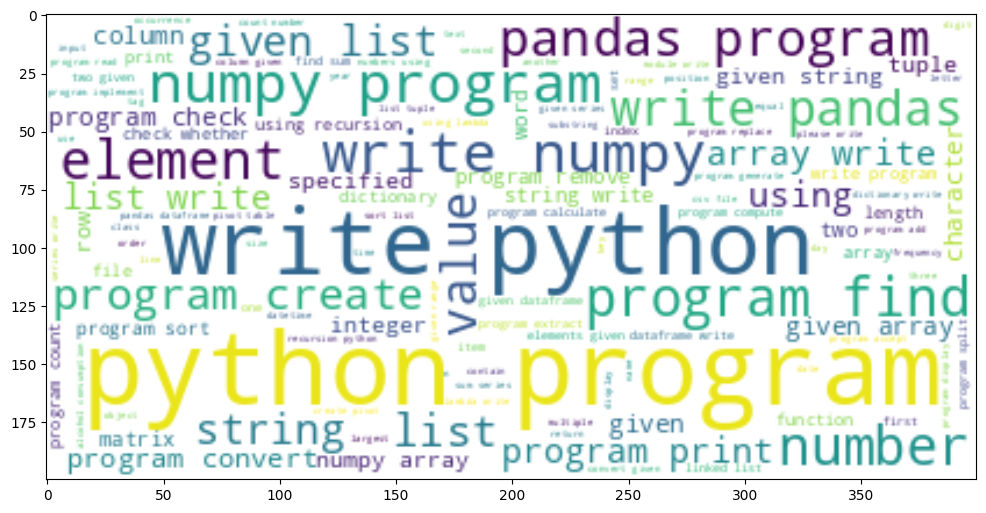

In [30]:
text = ' '.join(i.strip() for i in df['clean_problem'])

#Bigramas: Algunas palabras son importantes verlas juntas. Trigramas tambien.
word_cloud = WordCloud(max_words=2650, background_color='White').generate(text)

plt.figure(figsize=(12,12))

plt.imshow(word_cloud, interpolation='bilinear')

plt.show()

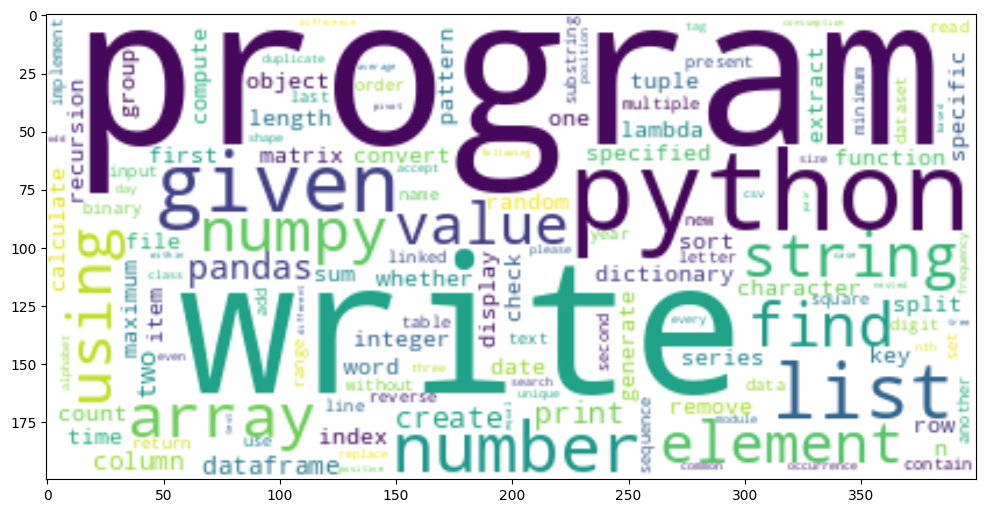

In [31]:
text = ' '.join(i.strip() for i in df['clean_problem'])

word_cloud = WordCloud(max_words=2650, background_color='White', collocations=False).generate(text)

plt.figure(figsize=(12,12))

plt.imshow(word_cloud, interpolation='bilinear')

plt.show()

In [32]:
#NLP Generativo. Para manejar el Python Solution

#Hay que eliminar el comentario en Python Solution. Manualmente, o programaticamente.

# NOTA Pueden haber comentarios inline. 